### Imports

In [1]:
import pandas as pd
import numpy as np

from hmmlearn.hmm import GaussianHMM
from pandas_datareader.data import DataReader
import yfinance as yf
import matplotlib.pyplot as plt

### Data Managment

In [2]:
start_date = '2021-01-01'
end_date = '2023-12-01'
symbol = 'SPY'
data = yf.download(symbol, start_date, end_date)
data = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Adj Close,Volume
Date,,,,,
2021-01-04,375.309998,375.450012,364.820007,352.767181,110210800
2021-01-05,368.100006,372.500000,368.049988,355.196808,66426200
2021-01-06,369.709991,376.980011,369.119995,357.320282,107997700
2021-01-07,376.100006,379.899994,375.910004,362.629181,68766800
2021-01-08,380.589996,381.489990,377.100006,364.695343,71677200


In [3]:
# Add Returns and Range
df = data.copy()
df['Returns'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
df['Range'] = (df['High'] / df['Low']) - 1
df.dropna(inplace = True)
df.head()


,Open,High,Low,Adj Close,Volume,Returns,Range
Date,,,,,,,
2021-01-05,368.100006,372.500000,368.049988,355.196808,66426200,0.006887,0.012091
2021-01-06,369.709991,376.980011,369.119995,357.320282,107997700,0.005978,0.021294
2021-01-07,376.100006,379.899994,375.910004,362.629181,68766800,0.014858,0.010614
2021-01-08,380.589996,381.489990,377.100006,364.695343,71677200,0.005698,0.011641
2021-01-11,377.850006,380.579987,377.720001,362.237061,51034700,-0.006741,0.007572


In [4]:
# Structure Data
X_train = df[['Returns', 'Range']]
X_train.head()

,Returns,Range
Date,,
2021-01-05,0.006887,0.012091
2021-01-06,0.005978,0.021294
2021-01-07,0.014858,0.010614
2021-01-08,0.005698,0.011641
2021-01-11,-0.006741,0.007572


### HMM Learning

In [5]:
# Train Model
model = GaussianHMM(n_components=4, covariance_type='full')
model.fit(X_train.values)

ValueError: 'covars' must be symmetric, positive-definite

In [ ]:
#Check Results
hidden_states = model.predict(X_train.values)
# print(hidden_states[:40])
# len(hidden_states)
print(hidden_states)

ValueError: 'covars' must be symmetric, positive-definite

In [ ]:
# Regime state means for each feature
model.means_

array([[ 0.00565508,  0.0109688 ],
       [ 0.00458283,  0.01281051],
       [-0.00412881,  0.0170326 ],
       [ 0.00580142,  0.01217195]])

In [ ]:
# Regime state covars for each feature
model.covars_

array([[[2.97455464e-04, 2.74215832e-04],
        [2.74215832e-04, 2.74498138e-04]],

       [[2.04697672e-04, 1.53305621e-04],
        [1.53305621e-04, 1.64825054e-04]],

       [[2.13392295e-04, 1.04462239e-05],
        [1.04462239e-05, 1.02058017e-04]],

       [[2.01117651e-04, 1.65285961e-04],
        [1.65285961e-04, 1.64413387e-04]]])

### Data Visualization

In [ ]:
#Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df['Adj Close'].values.astype(float)
print('Correct number of rows: ', len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1


print(labels_0)
print(labels_1)
print(labels_2)
print(labels_3)
# print(prices)
# print(len(hidden_states))

Correct number of rows:  True
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 436.099365234375, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 422.2480163574219, nan, nan, nan, nan, nan, nan, 440.15716552734375, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 396.5334167480469, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

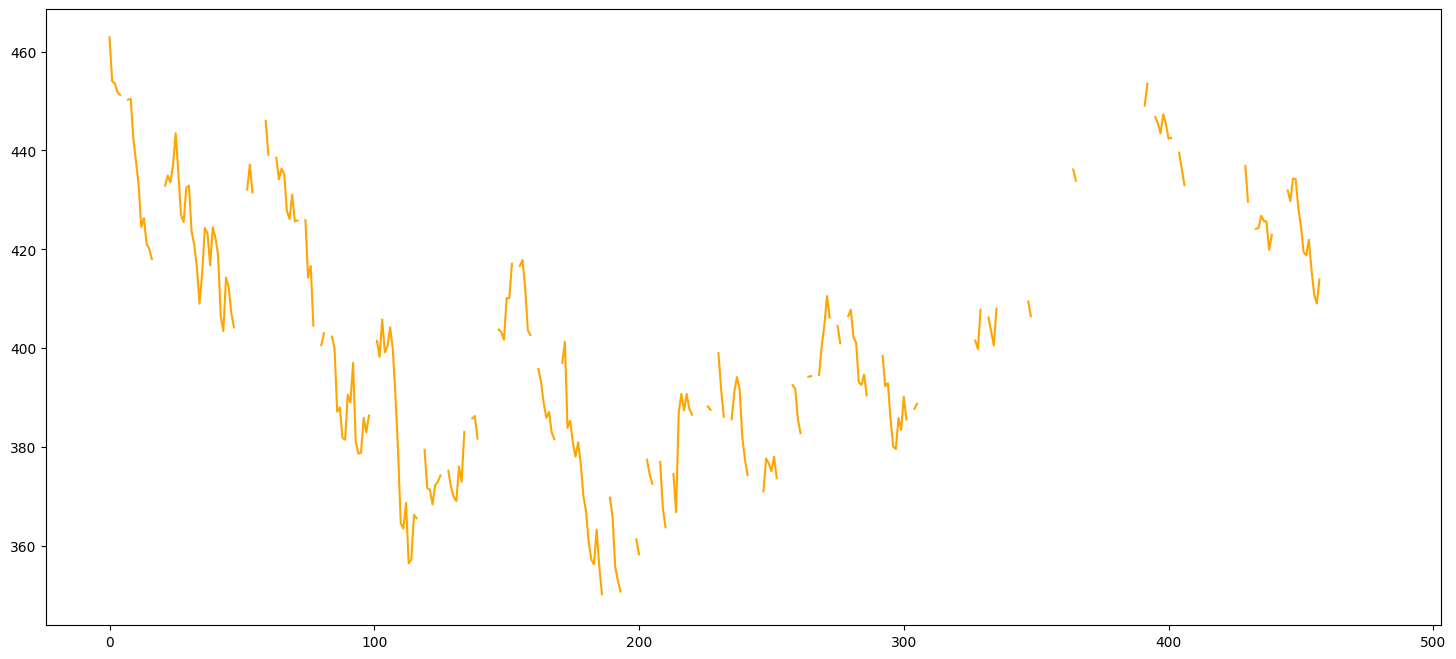

In [ ]:
# Plot Chart
fig = plt.figure(figsize=(18, 8))
# plt.plot(prices, color = 'red')
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()

In [ ]:
# fig = plt.figure(figsize=(18, 8))

# # Создаем маски для каждого состояния
# mask0 = hidden_states == 0
# mask1 = hidden_states == 1
# mask2 = hidden_states == 2
# mask3 = hidden_states == 3

# # Строим график для каждого состояния
# plt.plot(df['Adj Close'].index[mask0], df['Adj Close'][mask0], color="green")
# plt.plot(df['Adj Close'].index[mask1], df['Adj Close'][mask1], color="red")
# plt.plot(df['Adj Close'].index[mask2], df['Adj Close'][mask2], color="orange")
# plt.plot(df['Adj Close'].index[mask3], df['Adj Close'][mask3], color="black")

# plt.show()
